In [15]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_confusion_matrix

In [16]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [17]:
df.Class.unique()

array([0, 1])

# Problem statement

Build a classifier to predict which transactions are fraud. Fraud trasactions in the dataset has Class = 1.  Use features from V1 - V28.

Find accuracy of the your model and show the confusion matrix.

In [18]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
baseline_accuracy = 284315 / df.shape[0]
baseline_accuracy

0.9982725143693799

In [20]:
X = df.iloc[:, 1:-1]
y = df.Class

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 1230)

In [22]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C = 0.1, random_state = 1))
])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

(0.89534883720930236, 0.52380952380952384)

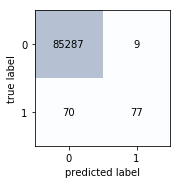

In [23]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob >= 0.5, 1, 0)
result = pd.DataFrame({"true": y_test, 
            "prob": y_test_prob, 
                      "predicted": y_test_pred})
result.sample(10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
precision = metrics.precision_score(y_test, y_test_pred) 
recall = metrics.recall_score(y_test, y_test_pred)
precision, recall

(0.80158730158730163, 0.68707482993197277)

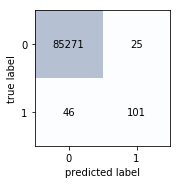

In [24]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob >= 0.2, 1, 0)
result = pd.DataFrame({"true": y_test, 
            "prob": y_test_prob, 
                      "predicted": y_test_pred})
result.sample(10)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
precision = metrics.precision_score(y_test, y_test_pred) 
recall = metrics.recall_score(y_test, y_test_pred)
precision, recall